**Student alcohol consumption study** 

I selected a dataset from Kaggle that examines alcohol consumption among over 300 students from two schools. The data was collected through a survey of students taking math and Portuguese language courses in secondary school. This dataset includes a wealth of information about students' social, academic, and demographic characteristics, offering valuable insights into trends and correlations between various factors, alcohol consumption, and academic performance.

The analysis is tailored for an audience of educational institutions, including teachers, administrators, and counselors. It aims to inform strategies for prevention, early intervention, and support services to address issues related to alcohol consumption and its impact on student success.

data set kaggkle link :https://www.kaggle.com/code/ellouzimedamin/student-grade-prediction

Table of content

A- Data Exploration
B- Data distribution 
C- Correlations
D- Model of prediction of grades based on the different features
E- Conclusion


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.


**A- Data cleaning**

In [69]:
df_mat = pd.read_csv('/Users/shendong/Desktop/Springboard_local/student_alcohol2/student-mat.csv')
df_por = pd.read_csv('/Users/shendong/Desktop/Springboard_local/student_alcohol2/student-por.csv')

In [70]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [71]:
#adding a column class with the name of the class
df_mat['class'] = 'mat'

In [72]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [73]:
#adding a column class with the name of the class
df_por['class'] = 'por'

In [74]:
#merge the 2 datasets
df = pd.concat([df_mat, df_por])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

In [75]:
#drop the duplicates
df = df.drop_duplicates(subset = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 0 to 642
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      662 non-null    object
 1   sex         662 non-null    object
 2   age         662 non-null    int64 
 3   address     662 non-null    object
 4   famsize     662 non-null    object
 5   Pstatus     662 non-null    object
 6   Medu        662 non-null    int64 
 7   Fedu        662 non-null    int64 
 8   Mjob        662 non-null    object
 9   Fjob        662 non-null    object
 10  reason      662 non-null    object
 11  guardian    662 non-null    object
 12  traveltime  662 non-null    int64 
 13  studytime   662 non-null    int64 
 14  failures    662 non-null    int64 
 15  schoolsup   662 non-null    object
 16  famsup      662 non-null    object
 17  paid        662 non-null    object
 18  activities  662 non-null    object
 19  nursery     662 non-null    object
 20  higher      662

In [10]:
#look for missing values
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
class         0
dtype: int64

**B- Data distribution**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

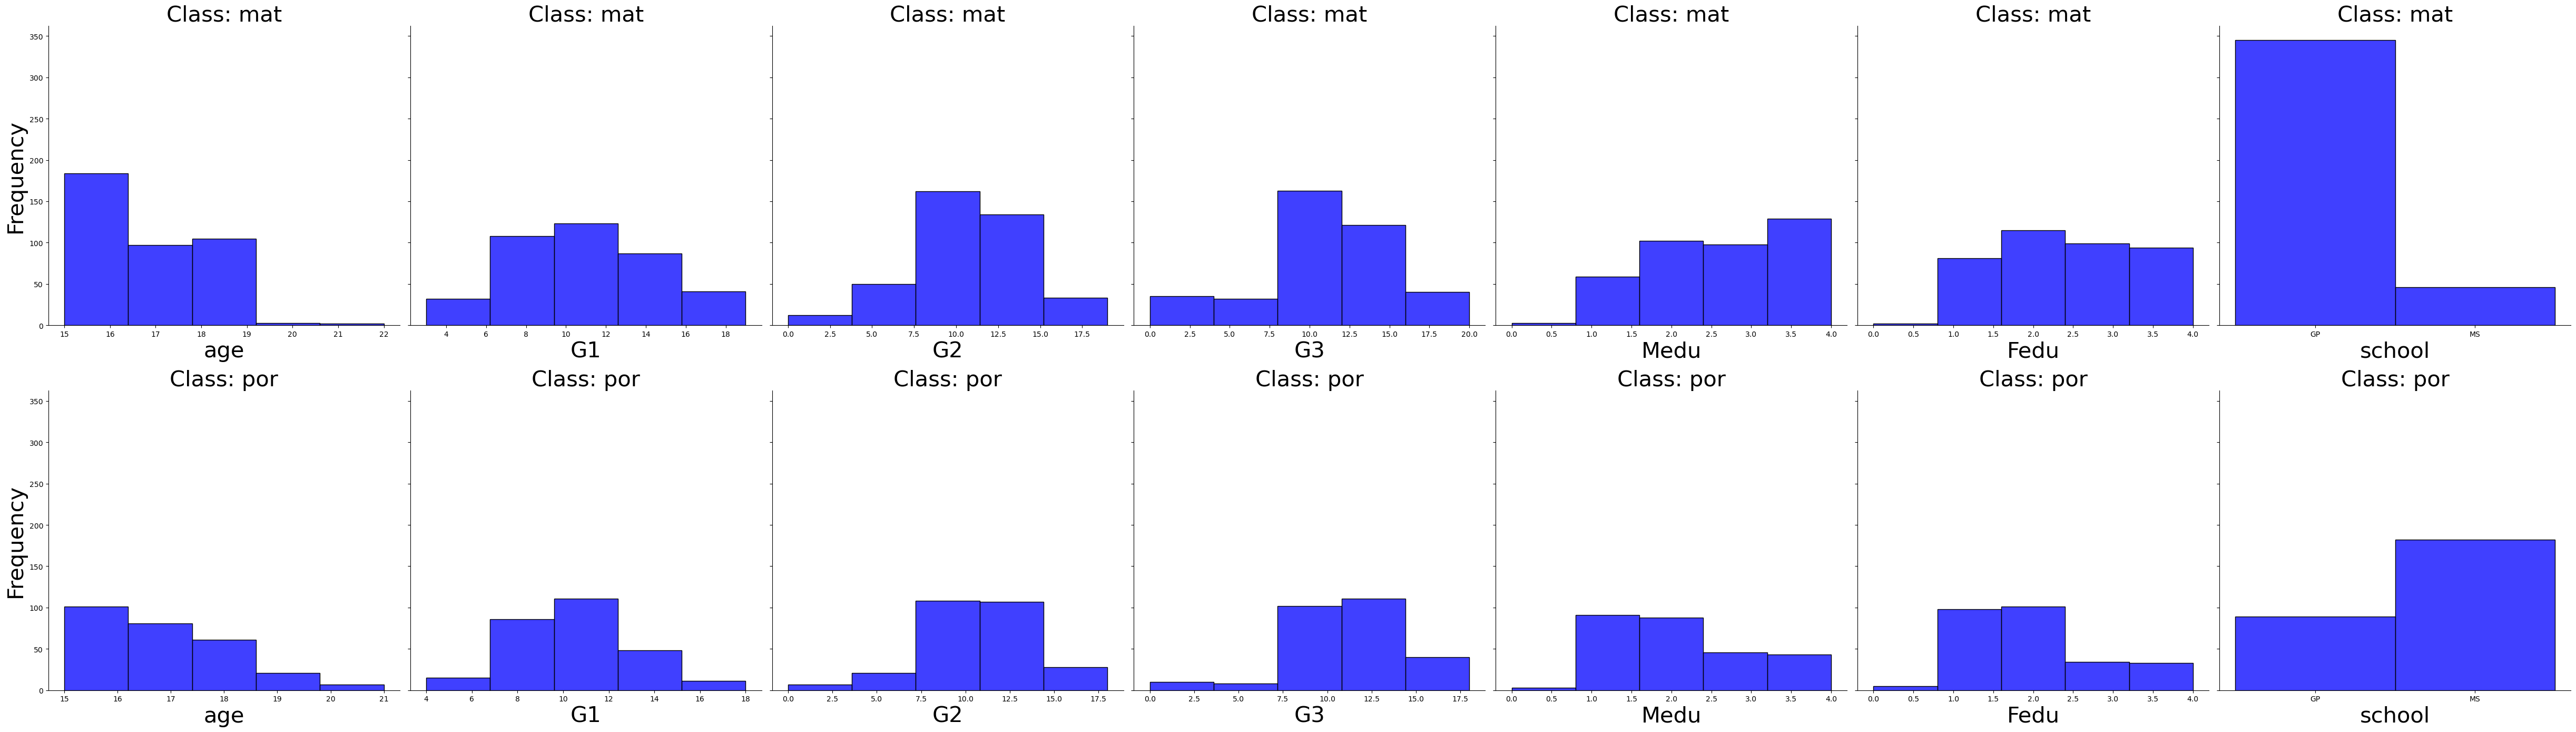

In [11]:
#comparing the distribution of the population age, grades and parents education between the math class and portuguese class

df_subset_class = df[['age', 'G1', 'G2', 'G3', 'Medu', 'Fedu', 'class', 'school']]

# Melt the DataFrame into a long format
df_melted = df_subset_class.melt(id_vars='class', var_name='Variable', value_name='Value')

# Create a FacetGrid grouped by the 'Group' column
g = sns.FacetGrid(df_melted, col='Variable', row='class', height=7, sharex=False, sharey=True)
g.map(sns.histplot, 'Value', bins=5, kde=False, color='blue')

# Add titles
g.set_titles("Class: {row_name}" )

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=30)

for row_axes in g.axes:  # Each row in the grid
    for ax, col_name in zip(row_axes, g.col_names):  # Pair each axis with its corresponding column name
        # Set the x-axis label to the column name
        ax.set_xlabel(col_name, fontsize=30)  # Set dynamic x-axis label

        # Set the y-axis label
        ax.set_ylabel("Frequency", fontsize=30)    # Set the y-axis label

    
plt.tight_layout()
plt.show()




**The distribution of age and grades is similar between the math and Portuguese classes. However, parents of students in the math class appear to have a higher level of education. For further analysis, we will combine the classes while remaining mindful of any differences between them to ensure these distinctions are addressed in the interpretation of results.
The distribution of age, grades when split between the school is the same compared when we split the data between the class. The last histogram columns show that majority of the portuguese class are from the MS school while GP school has mainly students from the math class. We will not take into account the school differences as itr is already transpiring within the class differences.**

In [12]:
#subset df with only 'G1', 'G2', 'G3' and class
df_grade_class = df_melted.loc[
    (df_melted['Variable'].isin(['G1', 'G2', 'G3']))
]

grouped_counts = df_grade_class.groupby(['class', 'Variable', 'Value']).size().reset_index(name='count')
grouped_counts

,class,Variable,Value,count
0,mat,G1,3,1
1,mat,G1,4,1
2,mat,G1,5,6
3,mat,G1,6,24
4,mat,G1,7,36
...,...,...,...,...
91,por,G3,14,24
92,por,G3,15,16
93,por,G3,16,8
94,por,G3,17,10


In [13]:
grouped_counts['percentage'] = (
    grouped_counts.groupby(['class', 'Variable'])['count']
    .transform(lambda x: (x / x.sum()) * 100)
)
grouped_counts

,class,Variable,Value,count,percentage
0,mat,G1,3,1,0.255754
1,mat,G1,4,1,0.255754
2,mat,G1,5,6,1.534527
3,mat,G1,6,24,6.138107
4,mat,G1,7,36,9.207161
...,...,...,...,...,...
91,por,G3,14,24,8.856089
92,por,G3,15,16,5.904059
93,por,G3,16,8,2.952030
94,por,G3,17,10,3.690037


In [14]:
# Create a complete list of grades (0 to 20) for each combination of school and quarter
grades_range = np.arange(0, 21)  # Grades from 0 to 20
classes = grouped_counts['class'].unique()
quarters = grouped_counts['Variable'].unique()

# Create a new DataFrame with all combinations of school, quarter, and grades (0 to 20)
full_combinations = pd.MultiIndex.from_product([classes, quarters, grades_range], names=['class', 'quarter', 'grade'])

# Reindex the grouped data to match this full combinations DataFrame
full_data = grouped_counts.set_index(['class', 'Variable', 'Value']).reindex(full_combinations, fill_value=0).reset_index()

# Now, 'full_data' has all combinations of school, quarter, and grade from 0 to 20, with missing values filled in as 0
print(full_data)

    class quarter  grade  count  percentage
0     mat      G1      0      0    0.000000
1     mat      G1      1      0    0.000000
2     mat      G1      2      0    0.000000
3     mat      G1      3      1    0.255754
4     mat      G1      4      1    0.255754
..    ...     ...    ...    ...         ...
121   por      G3     16      8    2.952030
122   por      G3     17     10    3.690037
123   por      G3     18      6    2.214022
124   por      G3     19      0    0.000000
125   por      G3     20      0    0.000000

[126 rows x 5 columns]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


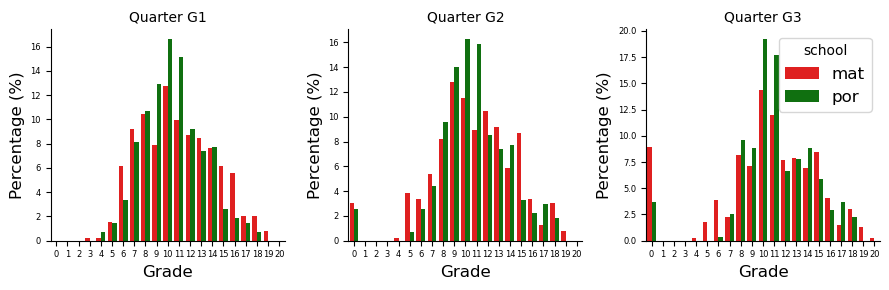

In [15]:
g = sns.FacetGrid(full_data, col="quarter", col_wrap=3, height=3, sharex=False, sharey=False)

# Map the barplot to the grid
g.map(sns.barplot, 'grade', 'percentage', 'class', 
      hue_order=np.unique(full_data["class"]), 
      errorbar=None, palette=sns.color_palette(['red','green']))

# Adjust titles and labels
g.set_titles("Quarter {col_name}", fontsize=16)
g.set_axis_labels("Grade", "Percentage (%)", fontsize=12)

# Adjust labels and title
for ax in g.axes.flat:
    ax.set_xlabel("Grade", fontsize=12)
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.tick_params(labelsize=6)

# Show the plot
 
plt.legend(title="school", loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


There is no significant differences in grade distribution for students form either math or the portuguese class 

In [16]:
df_sub = df[['Fedu', 'G1', 'G2', 'G3']]

df_melted_fed = df_sub.melt(id_vars='Fedu', var_name='Variable', value_name='Value')
df_melted_fed

,Fedu,Variable,Value
0,4,G1,5
1,1,G1,5
2,1,G1,7
3,2,G1,15
4,3,G1,6
...,...,...,...
1981,1,G3,0
1982,2,G3,15
1983,2,G3,15
1984,1,G3,9


In [17]:
grouped_fed = df_melted_fed.groupby(['Fedu', 'Variable', 'Value']).size().reset_index(name='count')
grouped_fed

,Fedu,Variable,Value,count
0,0,G1,8,1
1,0,G1,10,1
2,0,G1,11,3
3,0,G1,12,1
4,0,G1,13,1
...,...,...,...,...
195,4,G3,15,12
196,4,G3,16,7
197,4,G3,17,8
198,4,G3,18,5


In [18]:
grouped_fed['percentage'] = (
    grouped_fed.groupby(['Variable'])['count']
    .transform(lambda x: (x / x.sum()) * 100)
)
grouped_fed

,Fedu,Variable,Value,count,percentage
0,0,G1,8,1,0.151057
1,0,G1,10,1,0.151057
2,0,G1,11,3,0.453172
3,0,G1,12,1,0.151057
4,0,G1,13,1,0.151057
...,...,...,...,...,...
195,4,G3,15,12,1.812689
196,4,G3,16,7,1.057402
197,4,G3,17,8,1.208459
198,4,G3,18,5,0.755287


In [19]:
grades_range = np.arange(0, 21)  # Grades from 0 to 20
fedu = grouped_fed['Fedu'].unique()
quarters = grouped_fed['Variable'].unique()

# Create a new DataFrame with all combinations of school, quarter, and grades (0 to 20)
full_combinations_F = pd.MultiIndex.from_product([fedu, quarters, grades_range], names=['Fedu', 'quarters', 'grade'])

# Reindex the grouped data to match this full combinations DataFrame
full_data_F = grouped_fed.set_index(['Fedu', 'Variable', 'Value']).reindex(full_combinations_F, fill_value=0).reset_index()

# Now, 'full_data' has all combinations of school, quarter, and grade from 0 to 20, with missing values filled in as 0
print(full_data_F)

     Fedu quarters  grade  count  percentage
0       0       G1      0      0    0.000000
1       0       G1      1      0    0.000000
2       0       G1      2      0    0.000000
3       0       G1      3      0    0.000000
4       0       G1      4      0    0.000000
..    ...      ...    ...    ...         ...
310     4       G3     16      7    1.057402
311     4       G3     17      8    1.208459
312     4       G3     18      5    0.755287
313     4       G3     19      2    0.302115
314     4       G3     20      0    0.000000

[315 rows x 5 columns]


In [20]:
full_data_F['Fedu'] = full_data_F['Fedu'].astype(str)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


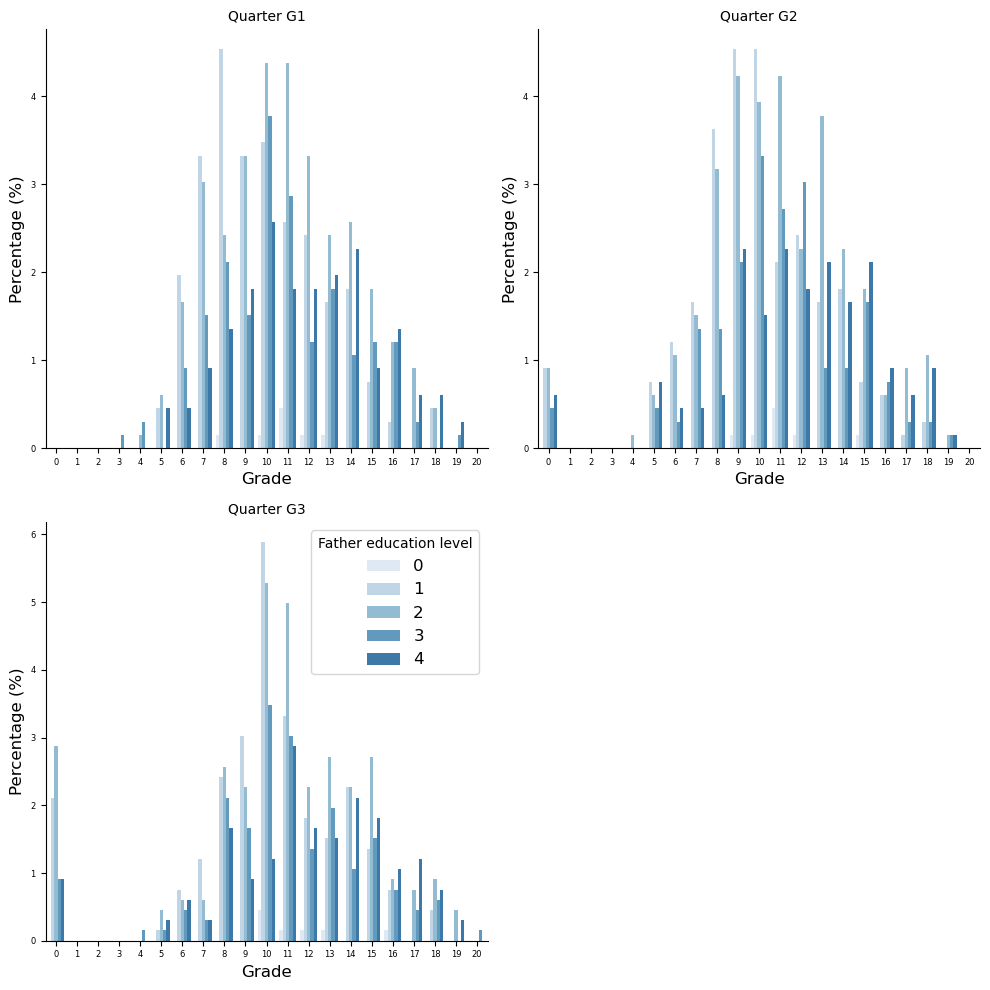

In [21]:
g = sns.FacetGrid(full_data_F, col="quarters", col_wrap=2, height=5, sharex=False, sharey=False)

# Map the barplot to the grid
g.map(sns.barplot, 'grade', 'percentage', 'Fedu', 
      hue_order=np.unique(full_data_F["Fedu"]), 
      errorbar=None, palette=sns.color_palette(palette = 'Blues'))

# Adjust titles and labels
g.set_titles("Quarter {col_name}", fontsize=16)
g.set_axis_labels("Grade", "Percentage (%)", fontsize=12)

# Adjust labels and title
for ax in g.axes.flat:
    ax.set_xlabel("Grade", fontsize=12)
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.tick_params(labelsize=6)

# Show the plot
 
plt.legend(title="Father education level", loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

The percentage of the students with father with lower education level (0,1,2) is higher in the grade from 0 to 10.

**Insights from Data Distribution Analysis:**

- Grades and Age Distribution:
    There are no significant differences in the grade or age distributions across schools or classes.

- Class Enrollment Trends:
    A larger proportion of students in the GP school are enrolled in math classes. \
    Conversely, more students in the MS school are attending Portuguese classes.

- Parental Education and Class Selection:
    Students from the MS school attending math classes tend to have parents with higher levels of education, particularly higher education.

- Grade Distribution by Class:
    The overall grade distributions between the two classes (math and Portuguese) show no major differences.
    However, the Portuguese class has a slightly higher percentage of students achieving medium grades (10–11) compared to the math class.

- Father's Education and Grade Trends:
        Students whose fathers have lower levels of education are more likely to achieve lower grades.
        In contrast, higher grades are more frequently associated with students whose fathers have higher levels of education.



Now that we have a sense of the overall population and have some insight on the students perfomance and background, we want to dig deeper in the correlations of all those features with alcohol consumption.

questions we would like to adress:
- what other factors are predictive of grades and alcohol consumption?
- are there correlation with gardes and alcohol consumption?
- are there correlation with parents education and alcohol consumption?


**C- Correlations**

1- Correlation between alcohol consumption and categorical features

In [22]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'class'],
      dtype='object')

We start by looking at the correlation with weekdays alcohol consumption

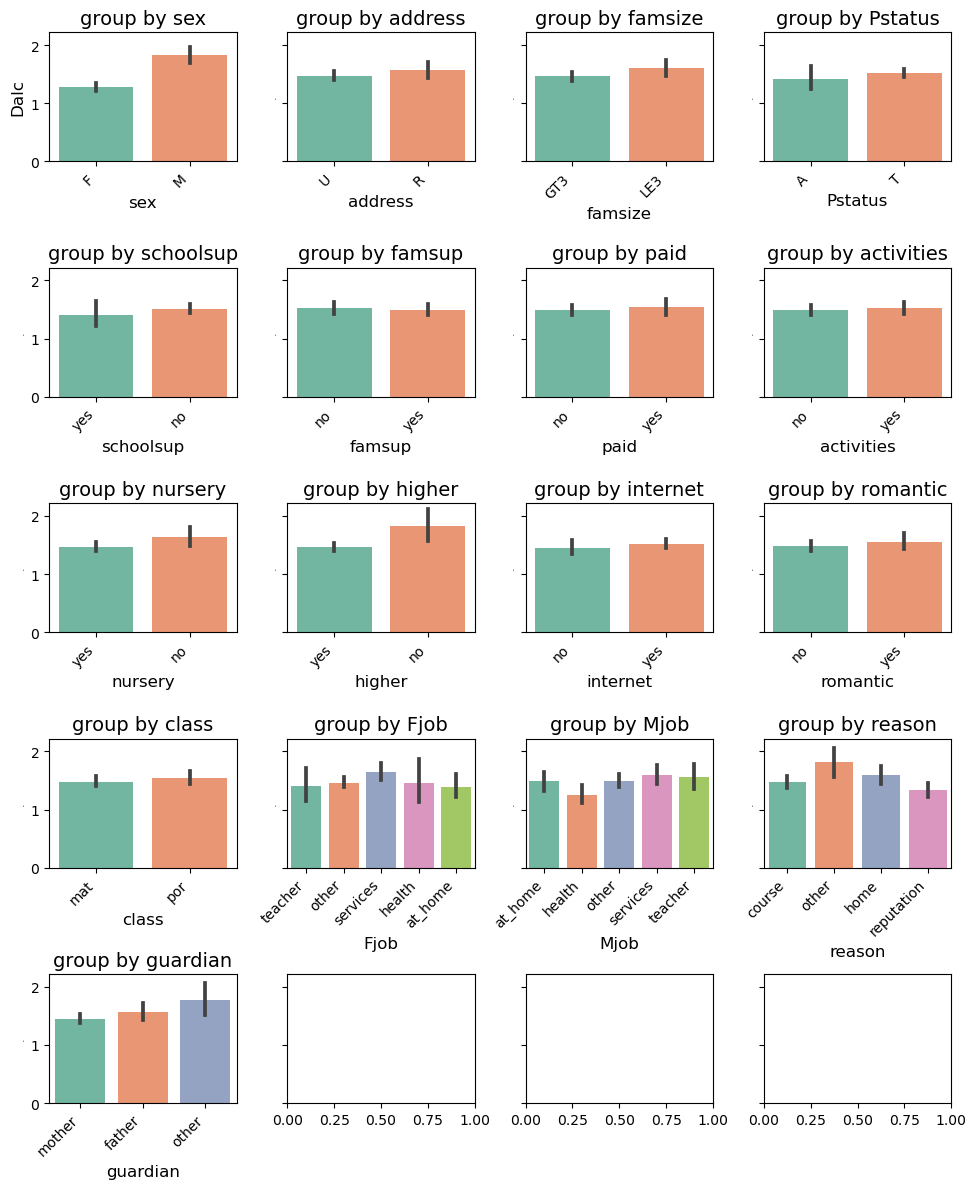

In [48]:

# Select columns to plot
grouping_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'class', 'Fjob', 'Mjob', 'reason', 'guardian']



fig, axes = plt.subplots(5, 4, figsize=(10, 12), sharey=True)
axes = axes.flatten()  
# Iterate through grouping columns and plot on subplots
for ax, grouping_col in zip(axes, grouping_columns):
    sns.barplot(data=df, x=grouping_col, y='Dalc', palette="Set2", ax=ax)
    ax.set_title(f"group by {grouping_col}", fontsize=14)
    ax.set_xlabel(grouping_col, fontsize=12)
    ax.set_ylabel('Dalc', fontsize=12 if ax == axes[0] else 0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  
   

# Adjust layout
plt.tight_layout()
plt.show()




It seems that only gender ('sex') and seeking for higher education ('higher') are the 2 binary features that are correlated to the weekdays alcohol consumption.
- male population seems to have a higher level of alcohol consumption during weekdays
- population seeking for higher education seems to have lower level alcohol consumption during weekdays
- Categorical features such as father's job, mother's job, relationship of the student's guardian and reason for which they choose the school  seem to affect the alcohol consumption

How about the weekend consumption?

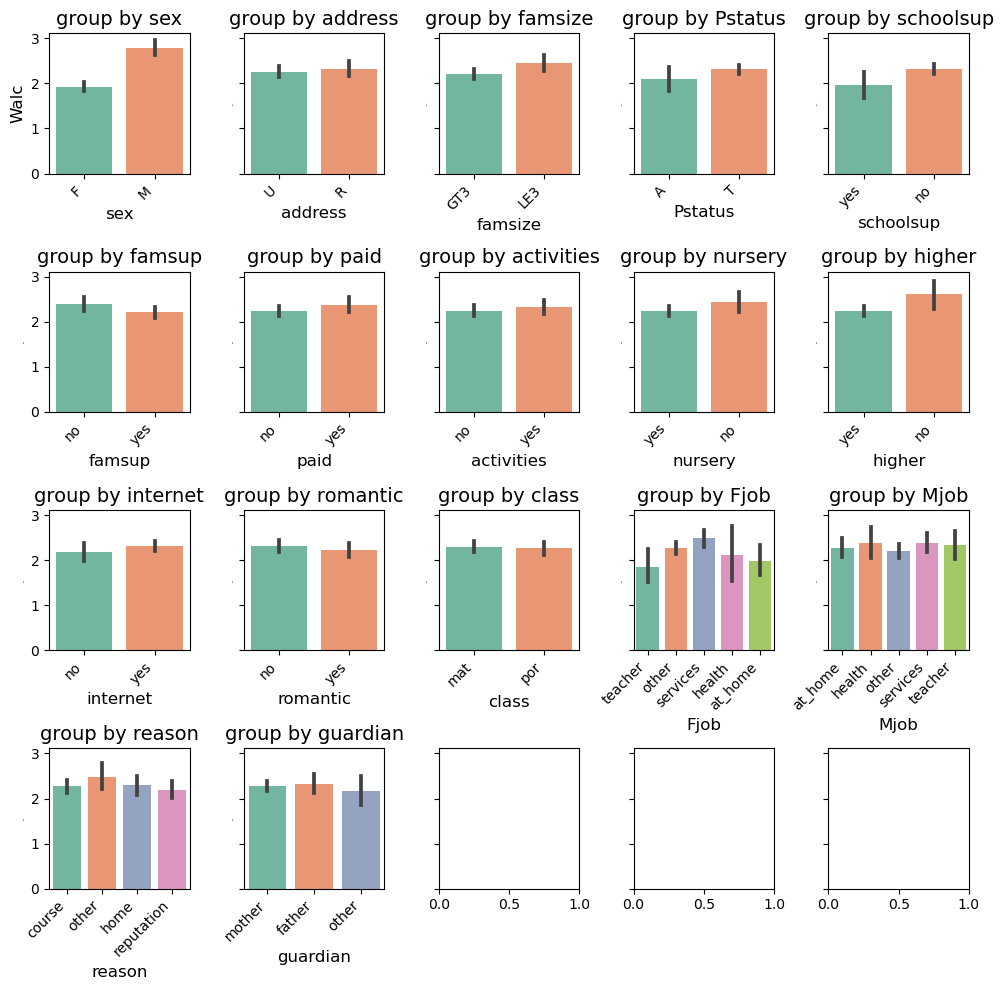

In [51]:
fig, axes = plt.subplots(4, 5, figsize=(10, 10), sharey=True)
axes = axes.flatten()  
# Iterate through grouping columns and plot on subplots
for ax, grouping_col in zip(axes, grouping_columns):
    sns.barplot(data=df, x=grouping_col, y='Walc', palette="Set2", ax=ax)
    ax.set_title(f"group by {grouping_col}", fontsize=14)
    ax.set_xlabel(grouping_col, fontsize=12)
    ax.set_ylabel('Walc', fontsize=12 if ax == axes[0] else 0)  # Label y-axis only on the first subplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Adjust layout
plt.tight_layout()
plt.show()


For weekend alcohol consumption. We see the same trend than weekdays. In addition, having extra educationnal support ('schoolsup') population show less weekend alcohol consumption. 

2- Correlation between all the numerical features

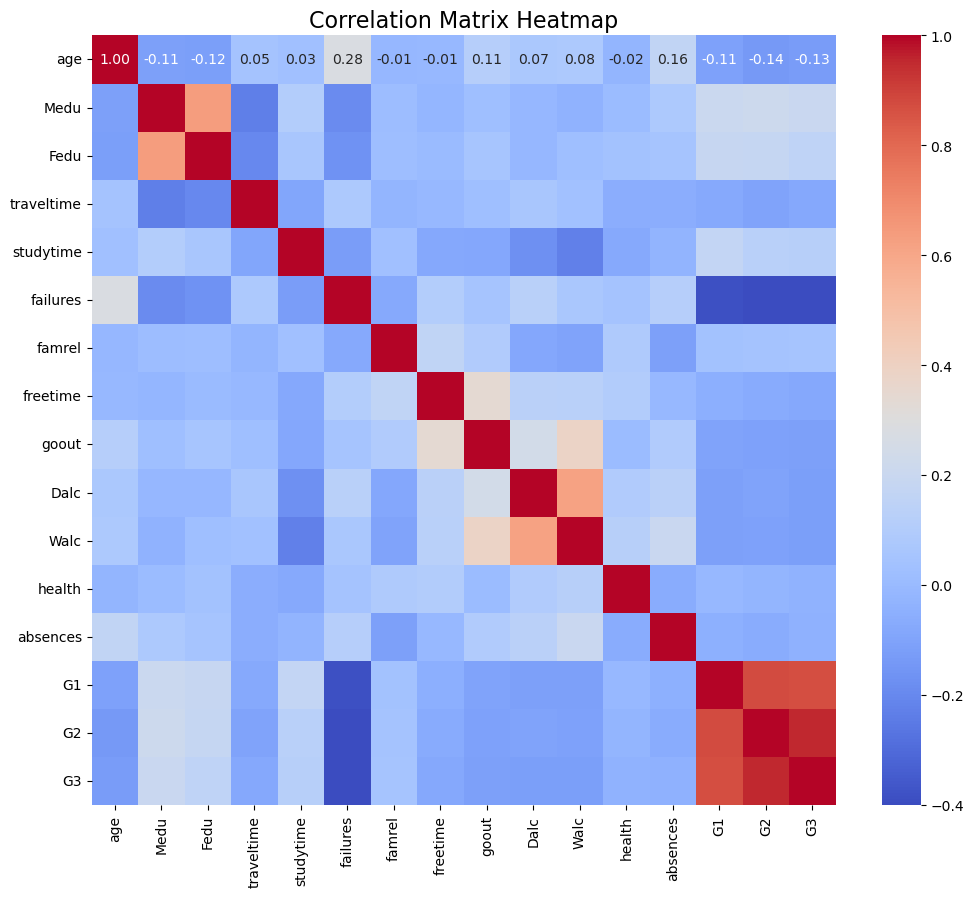

In [25]:
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

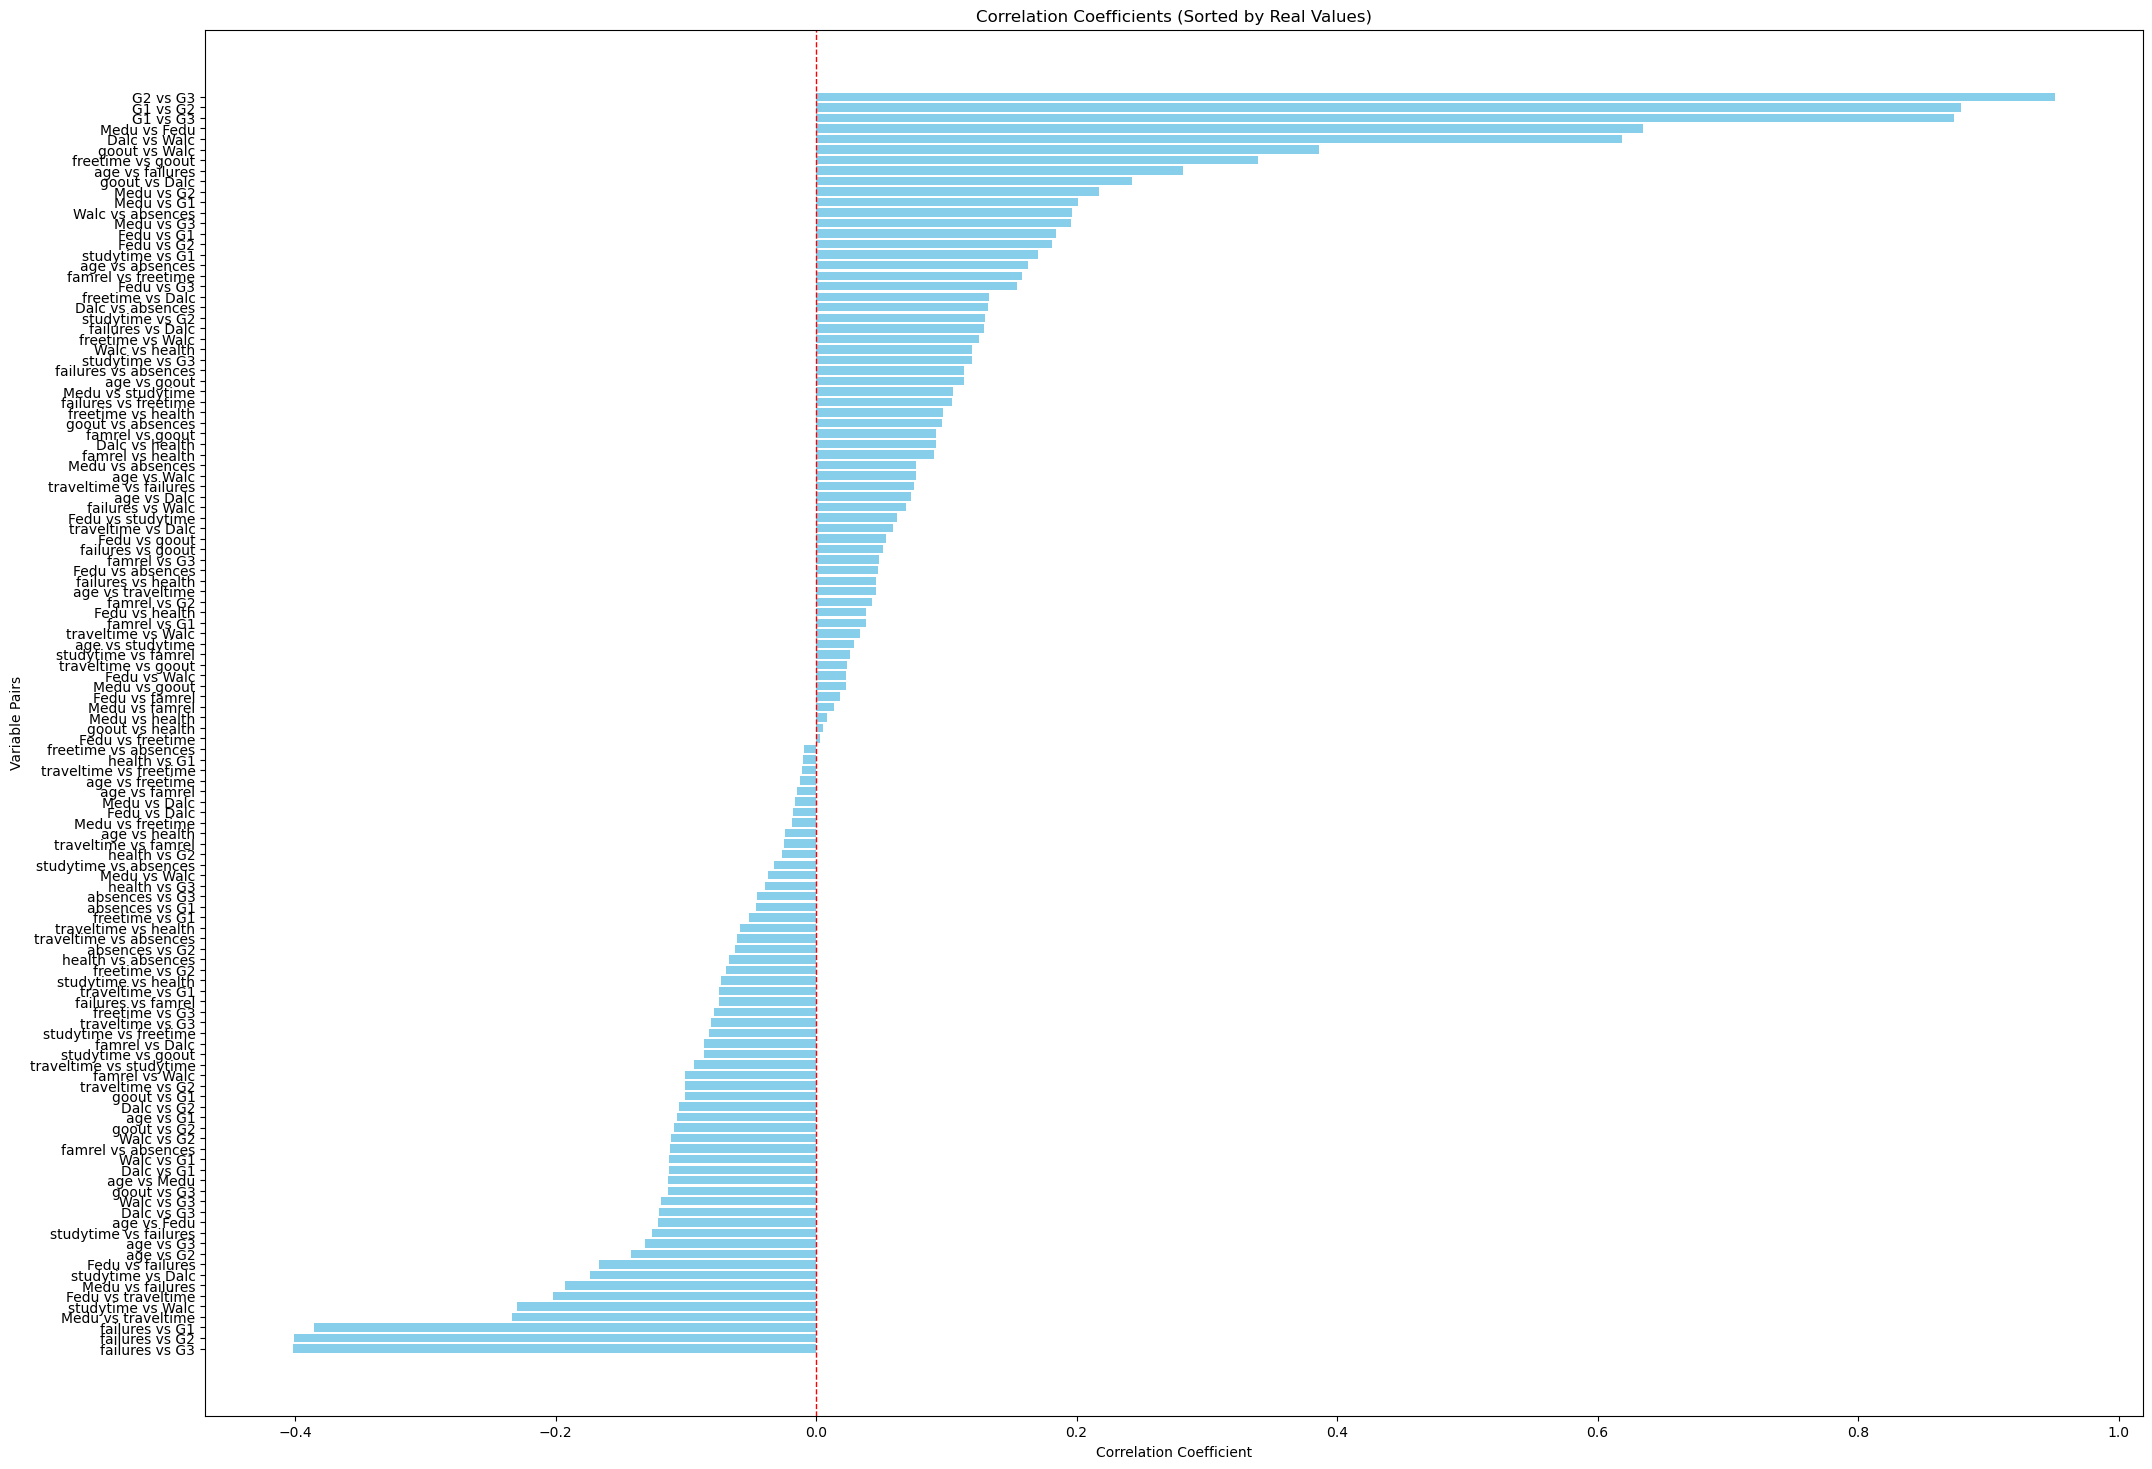

In [34]:
correlations = []
for i in range(len(correlation_matrix)):
    for j in range(i + 1, len(correlation_matrix)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        coef = correlation_matrix.iloc[i, j]
        correlations.append((f"{col1} vs {col2}", coef))

correlations_sorted = sorted(correlations, key=lambda x: x[1])

# Prepare data for bar plot
pairs, coef_values = zip(*correlations_sorted)

# Create bar plot
plt.figure(figsize=(25, 18))
plt.barh(pairs, coef_values, color="skyblue")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variable Pairs")
plt.yticks(fontsize=10)
plt.title("Correlation Coefficients (Sorted by Real Values)")
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at 0
plt.show()


we have 16x16 = 256 combinaisions for the correlation matrix. The horizontal ranked bar graph representation allows us to vizualize the positively correlated and the negatively correlated factors.
By vizualizing the top (positively correlation) and bottom (negative correlation) 10%, we can have insight of what are the most correlated features.

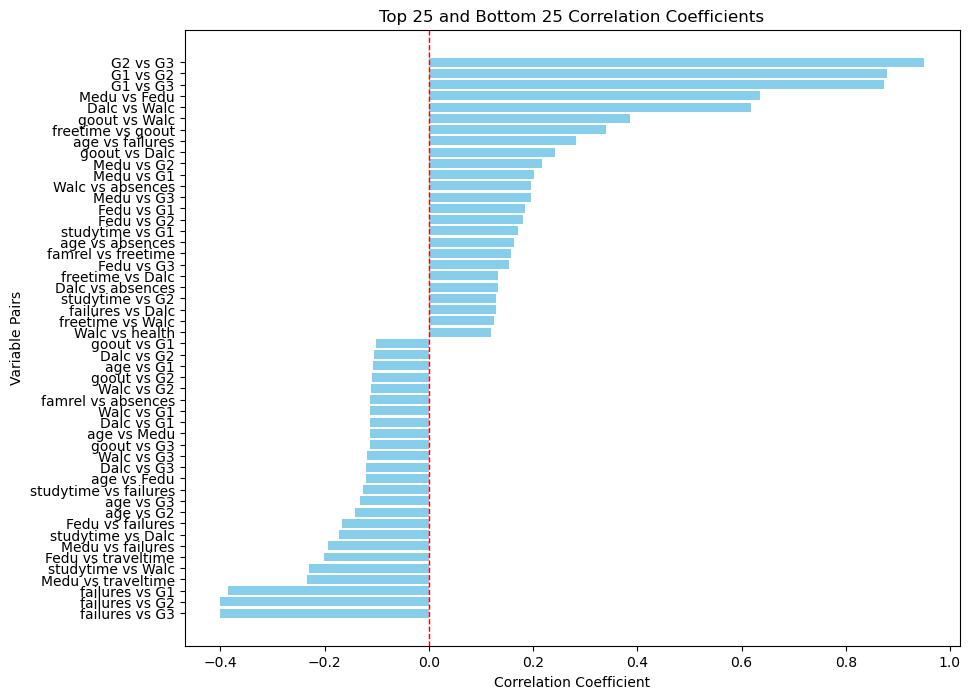

In [37]:
top_25 = correlations_sorted[-25:]  # Highest correlations
bottom_25 = correlations_sorted[:25]  # Lowest correlations

# Combine for the plot
filtered_correlations = bottom_25 + top_25
pairs, coef_values = zip(*filtered_correlations)

# Create bar plot
plt.figure(figsize=(10, 8))
plt.barh(pairs, coef_values, color="skyblue")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variable Pairs")
plt.title("Top 25 and Bottom 25 Correlation Coefficients")
plt.yticks(fontsize=10)  # Adjust font size for y-axis labels
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at 0

plt.show()




- Weekday and weekend alcohol consumption (Dalc, Walc) inverse correlation with grades (G1, G2, G3) rank among the top 10% of most neagatively correlated factors. However, they are not the top correlated features.
  
- The most obvious positive correlation ranked in the top 10% are:
  - Grades are correlated with the Mother's education (Medu) and Father's education (Fedu), confirming the grade distribution bar plots. 
  - grades between the periods (G1 vs G2 vs G3)
  - Mother's education (Medu) vs Father's education (Fedu)  
  - weekend alcohol consumption (Walc) vs time going out with friends(goout)
  - freetime vs goout
  - studytime vs grade (G2)
 
- The most obvious neagtive correlation ranked in the top 10% are:
  - number of past class failures (failures) vs grades (G1, G2 and G3)
  - studytime vs Walc/Dalc
  - studytime vs failures

- More interestingly, this analysis revealed some less evident correlated features
  - the analysis confirmed the positive correlation between parents education and grades howerver it also highlited that mother's education correlates greater with better performance at school.
  - number of school absences (Abscence) and Weekend alcohol consumption (Walc) and week days alcohol consumption (Dalc).
  - Greater health is also positively correlated to higher weekend alcohol consumption.
  - Quality of family relationship (Famrel) is correlated to freetime.
  - Famrel is inversely correlated with number of school absences.
  - Failures are inversely correlated with the Mother's education (Medu) and Father's education (Fedu)


**D- Model for grade prediction**

In [76]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'class'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 0 to 642
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      662 non-null    int64 
 1   sex         662 non-null    int64 
 2   age         662 non-null    int64 
 3   address     662 non-null    int64 
 4   famsize     662 non-null    int64 
 5   Pstatus     662 non-null    int64 
 6   Medu        662 non-null    int64 
 7   Fedu        662 non-null    int64 
 8   Mjob        662 non-null    object
 9   Fjob        662 non-null    object
 10  reason      662 non-null    object
 11  guardian    662 non-null    object
 12  traveltime  662 non-null    int64 
 13  studytime   662 non-null    int64 
 14  failures    662 non-null    int64 
 15  schoolsup   662 non-null    int64 
 16  famsup      662 non-null    int64 
 17  paid        662 non-null    int64 
 18  activities  662 non-null    int64 
 19  nursery     662 non-null    int64 
 20  higher      662

In [78]:
categoricals=[]

for column in df.columns:
    if df[column].dtype=='object':
        categoricals.append(column)


In [79]:
categoricals

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'class']

In [80]:
#Encode binary features
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for column in categoricals:
    if len(df[column].value_counts())==2 :
        df[column]=label_encoder.fit_transform(df[column])

In [91]:
#Converts categorical variables into one-hot encoded columns
df_encoded = pd.get_dummies(df, columns=[
 'Mjob',
 'Fjob',
 'reason',
 'guardian'], prefix=[
 'Mjob',
 'Fjob',
 'reason',
 'guardian'], drop_first=False)


In [92]:
#generate features X and target y 
y = df_encoded['G3']
X = df_encoded.drop('G3', axis=1)

In [93]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)

array([[-0.7248073 , -0.83512628,  0.93619206, ..., -0.54592968,
         0.67924123, -0.30694442],
       [-0.7248073 , -0.83512628,  0.14769442, ...,  1.83173774,
        -1.472231  , -0.30694442],
       [-0.7248073 , -0.83512628, -1.42930085, ..., -0.54592968,
         0.67924123, -0.30694442],
       ...,
       [ 1.37967705, -0.83512628,  0.93619206, ..., -0.54592968,
         0.67924123, -0.30694442],
       [ 1.37967705, -0.83512628,  1.72468969, ..., -0.54592968,
        -1.472231  ,  3.25791883],
       [ 1.37967705, -0.83512628,  0.14769442, ..., -0.54592968,
         0.67924123, -0.30694442]])

In [94]:
#create training and testing dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [95]:
#fit model linear regression
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Model R2: {model.score(X_test, y_test)}")

Model R2: 0.8147443539614077


In [96]:
#Model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Step 2: Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1.0433
Mean Squared Error (MSE): 2.2293
Root Mean Squared Error (RMSE): 1.4931
R² Score: 0.8147


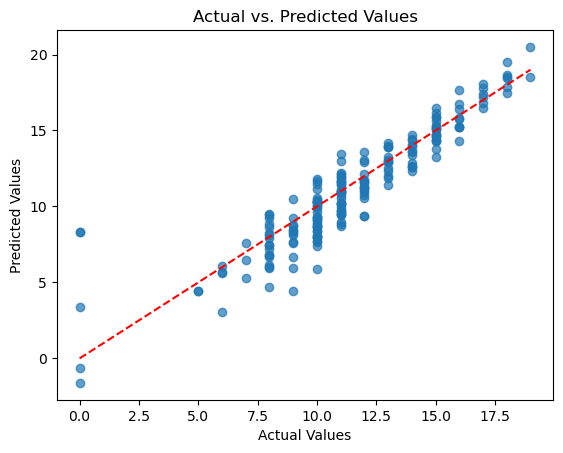

In [97]:
#compare the real values and predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

R² Score of 0.8355 is pretty good for this prediction model. 

**E- Conclusions**

Various visualizations and correlation analyses reveal that:

- Alcohol consumption is associated with lower grades.
- Male students alcohol consumption is greater then female students consumption.

- Beyond simple correlations cited above, the dataset provides insights into underlying factors linked to alcohol consumption:
    - Increased social outings and reduced study time are strongly inversely correlated with academic performance.
    - School support programs and student motivation, particularly among those aspiring to higher education, significantly enhance performance.
    - Socioeconomic status, family relationships, and parental influence also play a crucial role in shaping both alcohol consumption habits and academic outcomes.

While it is challenging to establish direct causality between these factors, the data suggests they can be used to reliably predict grades.

Therefore, educational institutions could leverage these findings to develop targeted support systems addressing key factors that impact student performance and alcohol consumption. For instance:
- Offering resources for students experiencing family relationship challenges.
- Providing free supplemental school support programs.
- Promoting the benefits of higher education and pathways to high-profile careers to inspire students.
- Raising awareness about the risks of excessive alcohol consumption through sensitization campaigns.
